# Python API examples


## Creates

- createUser
- createMarket
- createTrade

### Create user

Creates a new user. Returns signature and verify keys.

~~~~
import requests
url = 'https://blocmarket.herokuapp.com/createUser'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example return as json:

~~~~
{'signingKey_hex': '0cca0a3739eba76cc78823d9f6e898379014d8c53172f5e45c171a3c54a9f477',
 'traderId': '1',
 'verifyKey_hex': 'cdcfb59431b2579a681cee65656cbed6f8d578d5cc30d3e759e86c1d3e3529ef'}
~~~~
        
### Create/update market

Creates/updates a market. Returns True and market details if successful. 

Specify:
- Market root and branch id
- Minimum and maximum outcomes
- Trader Id
- Sign and verify keys

Note that sending the private key is a terrible idea. In production signing is done on client side.

~~~~
sk = '0cca0a3739eba76cc78823d9f6e898379014d8c53172f5e45c171a3c54a9f477'
vk = 'cdcfb59431b2579a681cee65656cbed6f8d578d5cc30d3e759e86c1d3e3529ef'
tId = 2

url = 'https://blocmarket.herokuapp.com/createMarket'
headers = {'content-type': 'application/json'}
content_makemarket = {"signingKey_hex": sk,
                    "traderId": tId, 
                    "verifyKey_hex": vk,
                    "marketRootId": 1, 
                    "marketBranchId": 1, 
                    "marketMin": 0,
                    "marketMax":1}

response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)
~~~~

Example return as json:

~~~~
 {'allChecks': 
     "{'marketId': '1', 'marketRangeChk': True,
     'sigChk': True, 'chainChk': True, 
     'ownerChk': True, 'timeChk': True}",
 'checks': 'False',
 'marketBranchId': 1,
 'marketId': 1,
 'marketMax': 0,
 'marketMin': 1,
 'marketRootId': 1,
 'traderId': 2}
~~~~
    
### Create trade

Create a trade. Returns True and trade details if successful.

Specify:

- Trader Id
- Market Id
- Price
- Quantity
- Sign and verify keys

~~~~
url = 'https://blocmarket.herokuapp.com/createTrade'
headers = {'content-type': 'application/json'}
content_maketrade = {'allChecks': 
                         "{'marketChk': True, 'sigChk': True,
                         'chainChk': True, 'timeChk': True,
                         'colChk': True}",
                     "signingKey_hex": sk,
                     "traderId": tId,
                     "verifyKey_hex": vk,
                     "marketId": mkId,
                     "price": 0.55,
                     "quantity":1}
response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
~~~~

Example return as json:
~~~~
{'checks': 'True',
 'marketId': 1,
 'price': 0.55,
 'quantity': -1,
 'traderId': '2'}
~~~~

## Views

- viewMarketBounds
- viewOrderBook
- viewOpenTrades
- viewMatchedTrades

### View markets

~~~~
url = 'https://blocmarket.herokuapp.com/viewMarketBounds'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":2,"2":3,"3":4},
"marketRootId":{"0":1,"1":2,"2":3,"3":4},
"marketBranchId":{"0":1,"1":1,"2":1,"3":1},
"marketMin":{"0":0.0,"1":0.0,"2":0.0,"3":0.0},
"marketMax":{"0":0.7,"1":0.7,"2":0.7,"3":0.7}}'
~~~~

### View full order book

~~~~
url = 'https://blocmarket.herokuapp.com/viewOrderBook'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":1,"2":1},"price":{"0":0.55,"1":0.55,"2":0.55},
"quantity":{"0":1.0,"1":-1.0,"2":-1.0},"traderId":{"0":1,"1":1,"2":1},
"iMatched":{"0":true,"1":true,"2":true},
"timeStampUTC":{"0":1547976585838,"1":1547976602766,"2":1547976613155}}'
~~~~

### View open trades

~~~~
url = 'https://https://blocmarket.herokuapp.com/viewOpenTrades'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

~~~~
'{"marketId":{"12":1,"15":1,"18":1,"21":1,"24":1},
"price":{"12":0.43,"15":0.43,"18":0.43,"21":0.43,"24":0.43},
"quantity":{"12":-1.0,"15":-1.0,"18":-1.0,"21":-1.0,"24":-1.0},
"traderId":{"12":1,"15":1,"18":1,"21":1,"24":1},"timeStampUTC":
{"12":1547976742476,"15":1547976750344,"18":1547976758683,"21":1547976768968,"24":1547976775537}}'
~~~~

### View matched trades

~~~~
url = 'https://blocmarket.herokuapp.com/viewMatchedTrades'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":1},"price":{"0":0.43,"1":0.55},"quantity":{"0":0.0,"1":0.0},"traderId":{"0":1,"1":1}}'

~~~~

### View trader summary

A view joining order book and marketTable for a particular trader.

~~~~
url = 'https://blocmarket.herokuapp.com/viewTradeSummary'
headers = {'content-type': 'application/json'}
content = {'traderId': 2}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":1},"price":{"0":0.8,"1":0.5},
"quantity":{"0":-1.0,"1":-1.0},"traderId":{"0":2,"1":2},
"iMatched":{"0":false,"1":true},
"timeStampUTC":{"0":1547982939316,"1":1547982938964},
"marketMin":{"0":0.0,"1":0.0},"marketMax":{"0":1.0,"1":1.0}}'
~~~~


# Python demonstration

In [4]:
import requests
import json
import numpy as np
import pandas as pd
import time

%matplotlib inline
import matplotlib.pyplot as plt

# Running flask app from powershell
# $env:FLASK_APP = "api"
# $env:FLASK_ENV = "development"
# flask run

# Running flask from terminal on OSX
# export FLASK_APP=api
# export FLASK_ENV=development
# flask run

# Running with gunicorn (heroku, digitalocean, etc):
# Procfile >
# web: gunicorn wsgi --log-file -
# wsgi.py >
# from api import app as application
#
#if __name__ == "__main__":
#    application.run()

# https://devcenter.heroku.com/articles/getting-started-with-python
# https://www.digitalocean.com/community/tutorials/how-to-serve-flask-applications-with-gunicorn-and-nginx-on-ubuntu-14-04


In [77]:
baseurl = 'https://blocmarket.herokuapp.com/'
#baseurl = 'http://127.0.0.1:5000/'
# baseurl = 'http://127.0.0.1:7000/'

In [78]:
url = baseurl +'createUser'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [79]:
response.json()

{'signingKey_hex': '035b4fdbb6880e282ae2f341e55aad072212a1a84de571433c369a96f6b98d3c',
 'traderId': '4',
 'verifyKey_hex': '4b7599efae57bdb3e049041cb9a98963c6ff2aa36ee0df0df1afa47df4daab46'}

In [80]:
url = baseurl + 'createMarket'

mkRtId = 7
mkId=1
# copy from response
sk = response.json()['signingKey_hex']
vk = response.json()['verifyKey_hex']
tId = response.json()['traderId']

In [81]:
content_makemarket = {"signingKey_hex": sk,
                    "traderId": int(tId), 
                    "verifyKey_hex": vk,
                    "marketRootId": mkRtId, 
                    "marketBranchId": 1, 
                    "marketMin": 0.1,
                    "marketMax":0.9}

response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)

In [82]:
response.json()

{'allChecks': "{'marketId': '1', 'marketRangeChk': True, 'sigChk': True, 'chainChk': True, 'ownerChk': False, 'timeChk': True}",
 'checks': 'False',
 'marketBranchId': 1,
 'marketId': 1,
 'marketMax': 0.9,
 'marketMin': 0.1,
 'marketRootId': 7,
 'traderId': 4}

In [83]:
# Save market id from response
mkId = response.json()['marketId']


In [84]:
pd.DataFrame(response.json(), index=[0])

,allChecks,checks,marketBranchId,marketId,marketMax,marketMin,marketRootId,traderId
0,"{'marketId': '1', 'marketRangeChk': True, 'sig...",False,1,1,0.9,0.1,7,4


In [85]:
# Create a trade
url = baseurl+'createTrade'

content_maketrade = {"signingKey_hex": sk,
                     "traderId": int(tId),
                     "verifyKey_hex": vk,
                     "marketId": mkId,
                     "price": 0.55,
                     "quantity":1}
# Post trade
response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)

In [86]:
response.json()

{'allChecks': "{'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 1,
 'price': 0.55,
 'quantity': 1,
 'traderId': 4}

In [87]:
# View json response
pd.DataFrame(response.json(), index=[0])


,allChecks,checks,marketId,price,quantity,traderId
0,"{'marketChk': True, 'sigChk': True, 'chainChk'...",True,1,0.55,1,4


In [88]:
# Create a matched trade
url = baseurl+'createTrade'
content_maketrade['quantity'] = -1
response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)

In [89]:
response.json()

{'allChecks': "{'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 1,
 'price': 0.55,
 'quantity': -1,
 'traderId': 4}

In [90]:
# Create many matched trades
url = baseurl+'createTrade'

for i in range(5):
    t = time.time()
    content_maketrade['quantity'] = -1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    content_maketrade['quantity']=1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('matched trade: ' + str(i) + ' in ' + str(time.time() - t) + ' seconds.')


matched trade: 0 in 3.1597490310668945 seconds.
matched trade: 1 in 3.531512975692749 seconds.
matched trade: 2 in 3.329587936401367 seconds.
matched trade: 3 in 3.3246288299560547 seconds.
matched trade: 4 in 3.432753086090088 seconds.


In [91]:
url = baseurl+'createMarket'

for i in range(4):
    t = time.time()

    content_makemarket = {"signingKey_hex": sk,
      "traderId": int(tId), "verifyKey_hex": vk,
      "marketRootId": i+1, "marketBranchId": 1, "marketMin": 0, "marketMax":0.7}

    response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)
    if response.json()['checks'] == 'True':
        print('market created: ' + str(i+1) + ' in ' + str(time.time() - t) + ' seconds.')
    else:
        print('failed to create market ' +str(i+1))
    

market created: 1 in 3.5606820583343506 seconds.
market created: 2 in 4.483973026275635 seconds.
market created: 3 in 5.975314140319824 seconds.
market created: 4 in 9.126484155654907 seconds.


In [92]:
response.json()

{'allChecks': "{'marketId': '5', 'marketRangeChk': True, 'sigChk': True, 'chainChk': True, 'ownerChk': True, 'timeChk': True}",
 'checks': 'True',
 'marketBranchId': 1,
 'marketId': 5,
 'marketMax': 0.7,
 'marketMin': 0,
 'marketRootId': 4,
 'traderId': 4}

In [93]:
url = baseurl+'viewMarketBounds'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)


In [94]:
a = pd.read_json(response.json())
a

,marketId,marketRootId,marketBranchId,marketMin,marketMax
0,1,7,1,0.1,0.9
1,2,1,1,0.0,0.7
2,3,2,1,0.0,0.7
3,4,3,1,0.0,0.7
4,5,4,1,0.0,0.7


In [97]:
url = baseurl+'viewOrderBook'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [98]:
a = pd.read_json(response.json())
a

,marketId,price,quantity,traderId,iMatched,timeStampUTC
0,1,0.471688,1,1,True,2019-01-26 06:38:33.338
1,1,0.471688,-1,1,True,2019-01-26 06:38:37.749
10,1,0.495635,-1,1,True,2019-01-26 06:38:51.177
100,1,0.521617,1,1,True,2019-01-26 06:41:56.402
1000,1,0.935851,1,1,True,2019-01-26 07:14:27.181
1001,1,0.844951,1,1,True,2019-01-26 07:14:28.982
1002,1,0.844951,-1,1,True,2019-01-26 07:14:33.751
1003,1,0.864951,-1,1,True,2019-01-26 07:14:30.760
1004,1,0.864951,1,1,True,2019-01-26 07:14:37.187
1005,1,0.851093,1,1,True,2019-01-26 07:14:38.967


In [99]:
# Create many unmatched trades
url = baseurl+'createTrade'

for i in range(5):
    t = time.time()
    content_maketrade['quantity'] = -1
    content_maketrade['price'] = 0.43
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('unmatched trade: ' + str(i) + ' in ' + str(time.time() - t) + ' seconds.')


unmatched trade: 0 in 1.6135001182556152 seconds.
unmatched trade: 1 in 1.4677789211273193 seconds.
unmatched trade: 2 in 1.656615972518921 seconds.
unmatched trade: 3 in 1.8042888641357422 seconds.
unmatched trade: 4 in 1.607240915298462 seconds.


In [100]:
a = response.json()
a

{'allChecks': "{'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 1,
 'price': 0.43,
 'quantity': -1,
 'traderId': 4}

In [101]:
url = baseurl+'viewOpenTrades'

content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [102]:
pd.read_json(response.json())

,marketId,price,quantity,traderId,timeStampUTC
2681,1,0.490771,-1,2,2019-01-26 11:50:21.895
3223,1,1.000000,-1,3,2019-01-26 13:39:19.986
3288,1,0.550000,1,4,2019-01-26 22:14:59.238
3291,1,0.550000,1,4,2019-01-26 22:15:02.551
3292,1,0.430000,-1,4,2019-01-26 22:16:06.636
3293,1,0.430000,-1,4,2019-01-26 22:16:08.111
3294,1,0.430000,-1,4,2019-01-26 22:16:09.695
3295,1,0.430000,-1,4,2019-01-26 22:16:11.528
3296,1,0.430000,-1,4,2019-01-26 22:16:13.078


In [103]:
url = baseurl+'viewMatchedTrades'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [104]:
pd.read_json(response.json())

,marketId,price,quantity,traderId
0,1,0.440767,0,3
1,1,0.441986,0,3
10,1,0.461264,0,3
100,1,0.508944,0,1
1000,1,0.912628,0,1
1001,1,0.912668,0,1
1002,1,0.912784,0,1
1003,1,0.912816,0,1
1004,1,0.912869,0,3
1005,1,0.912901,0,1


In [105]:
# Create many matched trades (own)
url = baseurl+'createTrade'

for i in range(5):
    t = time.time()
    content_maketrade['quantity'] = -1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    content_maketrade['quantity']=1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('matched trade: ' + str(i) + ' in ' + str(time.time() - t) + ' seconds.')


matched trade: 0 in 3.4114649295806885 seconds.
matched trade: 1 in 3.698401927947998 seconds.
matched trade: 2 in 3.08240008354187 seconds.
matched trade: 3 in 3.0519561767578125 seconds.
matched trade: 4 in 3.6231539249420166 seconds.


In [106]:
url = baseurl+'viewTradeSummary'
content = {'traderId': int(tId)}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [107]:
pd.read_json(response.json())

,marketId,price,quantity,traderId,iMatched,timeStampUTC,marketMin,marketMax,marketMinOutcome,marketMaxOutcome
0,1,0.55,-1,4,True,2019-01-26 22:14:42.984,0.1,0.9,0.45,-0.35
1,1,0.55,-1,4,True,2019-01-26 22:14:47.378,0.1,0.9,0.45,-0.35
10,1,0.55,-1,4,True,2019-01-26 22:15:00.878,0.1,0.9,0.45,-0.35
11,1,0.55,1,4,False,2019-01-26 22:15:02.551,0.1,0.9,-0.45,0.35
12,1,0.43,-1,4,False,2019-01-26 22:16:25.320,0.1,0.9,0.33,-0.47
13,1,0.43,-1,4,True,2019-01-26 22:16:06.636,0.1,0.9,0.33,-0.47
14,1,0.43,-1,4,True,2019-01-26 22:16:08.111,0.1,0.9,0.33,-0.47
15,1,0.43,-1,4,True,2019-01-26 22:16:09.695,0.1,0.9,0.33,-0.47
16,1,0.43,-1,4,True,2019-01-26 22:16:11.528,0.1,0.9,0.33,-0.47
17,1,0.43,-1,4,True,2019-01-26 22:16:13.078,0.1,0.9,0.33,-0.47


In [108]:
url = baseurl+'getSignedUTCTimestamp'
content = {}
response = requests.get(url, data=json.dumps(content), headers=headers)


In [109]:
response.json()

{'timeStampUTC': '2019-01-26 22:16:44.684740',
 'timeStampUTCSignature': "b'^(GU`\\xa9\\xd9\\xe3|\\x89\\x85D\\x1a\\xee(\\xa0\\xcc9{\\xfc\\xcb\\r\\x9aS\\xbcZ?\\xee\\xb6\\xdfg\\x06\\x02\\xe4\\xf5eP\\x1f\\xe0\\xb2\\xd2\\xc7\\xe4\\x14l\\x11\\xcf\\xc3\\xc2T\\x08\\xfa\\x1cf\\x01\\xc1\\xe5N\\xce>\\xc7\\xf7\\x90\\x04'",
 'verifyKey': 'cdcfb59431b2579a681cee65656cbed6f8d578d5cc30d3e759e86c1d3e3529ef'}

In [110]:
# A simple bot with an OU process

url = baseurl+'createTrade'

m = 0.5
k = 0.01
v = 0.05
B = m

for i in range(20):
    # Create bounded [0,1] random reverting to m
    dW = np.random.normal()
    if i==0:
        dLnB = v*dW
    else:
        dLnB = -k*(np.log(B)-m) + v*dW
    
    # Bound between zero and one
    B *= np.exp(dLnB)
    B = min(max(B, 0.01),0.99)
    
    # Make a bid
    content_maketrade['price'] = B-0.01
    content_maketrade['quantity'] =1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    # Make an offer
    content_maketrade['price'] = B+0.01
    content_maketrade['quantity'] = -1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    time.sleep(0.1)
    
    # Remove bid
    content_maketrade['price'] = B-0.01
    content_maketrade['quantity'] =-1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    # Remove offer
    content_maketrade['price'] = B+0.01
    content_maketrade['quantity'] = 1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('Price: ' + str(content_maketrade['price']))

Price: 0.5785202233320462
Price: 0.563036060169385
Price: 0.6105922284135876
Price: 0.6276927080196484
Price: 0.6477899059056916
Price: 0.6621106558966701
Price: 0.6525217730014929
Price: 0.628198708213082
Price: 0.6352374747222875
Price: 0.6990803756920467
Price: 0.7205354060636503
Price: 0.7173241977447002
Price: 0.7255869311841238
Price: 0.7212001563524774
Price: 0.6828407958611153
Price: 0.6692567041124977
Price: 0.6370981268507692
Price: 0.5902434820661613
Price: 0.6091040449191153
Price: 0.5483780537971187


In [111]:

url = baseurl+'viewTradeSummary'
content = {'traderId': int(tId)}
response = requests.post(url, data=json.dumps(content), headers=headers)
a = pd.read_json(response.json())
a

,marketId,price,quantity,traderId,iMatched,timeStampUTC,marketMin,marketMax,marketMinOutcome,marketMaxOutcome
0,1,0.550000,-1,4,True,2019-01-26 22:14:42.984,0.1,0.9,0.450000,-0.350000
1,1,0.550000,-1,4,True,2019-01-26 22:14:47.378,0.1,0.9,0.450000,-0.350000
10,1,0.550000,-1,4,True,2019-01-26 22:15:00.878,0.1,0.9,0.450000,-0.350000
100,1,0.589104,1,4,True,2019-01-26 22:18:57.499,0.1,0.9,-0.489104,0.310896
101,1,0.589104,-1,4,True,2019-01-26 22:19:00.854,0.1,0.9,0.489104,-0.310896
102,1,0.609104,1,4,True,2019-01-26 22:19:02.559,0.1,0.9,-0.509104,0.290896
103,1,0.528378,1,4,True,2019-01-26 22:19:04.123,0.1,0.9,-0.428378,0.371622
104,1,0.528378,-1,4,True,2019-01-26 22:19:07.317,0.1,0.9,0.428378,-0.371622
105,1,0.548378,-1,4,True,2019-01-26 22:19:05.616,0.1,0.9,0.448378,-0.351622
106,1,0.548378,1,4,True,2019-01-26 22:19:08.807,0.1,0.9,-0.448378,0.351622


In [112]:
a = a.set_index(a['timeStampUTC'])
a



,marketId,price,quantity,traderId,iMatched,timeStampUTC,marketMin,marketMax,marketMinOutcome,marketMaxOutcome
timeStampUTC,,,,,,,,,,
2019-01-26 22:14:42.984,1,0.550000,-1,4,True,2019-01-26 22:14:42.984,0.1,0.9,0.450000,-0.350000
2019-01-26 22:14:47.378,1,0.550000,-1,4,True,2019-01-26 22:14:47.378,0.1,0.9,0.450000,-0.350000
2019-01-26 22:15:00.878,1,0.550000,-1,4,True,2019-01-26 22:15:00.878,0.1,0.9,0.450000,-0.350000
2019-01-26 22:18:57.499,1,0.589104,1,4,True,2019-01-26 22:18:57.499,0.1,0.9,-0.489104,0.310896
2019-01-26 22:19:00.854,1,0.589104,-1,4,True,2019-01-26 22:19:00.854,0.1,0.9,0.489104,-0.310896
2019-01-26 22:19:02.559,1,0.609104,1,4,True,2019-01-26 22:19:02.559,0.1,0.9,-0.509104,0.290896
2019-01-26 22:19:04.123,1,0.528378,1,4,True,2019-01-26 22:19:04.123,0.1,0.9,-0.428378,0.371622
2019-01-26 22:19:07.317,1,0.528378,-1,4,True,2019-01-26 22:19:07.317,0.1,0.9,0.428378,-0.371622
2019-01-26 22:19:05.616,1,0.548378,-1,4,True,2019-01-26 22:19:05.616,0.1,0.9,0.448378,-0.351622


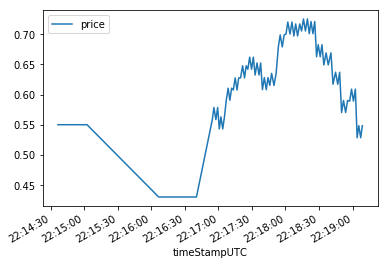

In [113]:
plt.figure(); a['price'].plot(); plt.legend(loc='best')


# Curl API examples



## Create user

~~~~
curl --header "Content-Type: application/json" -X POST http://blocmarket.herokuapp.com/createUser
~~~~
        
## Create market

~~~~
curl --data '{"signingKey_hex": "ece2efc138c8298d43caba1315ceda614e20644c74d46fed37871c47ea19afdf",
"traderId": 1, 
"verifyKey_hex": "9690a2e12971ae452d68bf3d08405090d45791533cf80740fd186aea4b6773fc",
"marketRootId": 1, 
"marketBranchId": 5, 
"marketMin": 0, 
"marketMax": 1}' 
--header "Content-Type: application/json" -X POST http://blocmarket.herokuapp.com/createMarket
~~~~
    
## Create trade

~~~~
curl --data '{"signingKey_hex": "ece2efc138c8298d43caba1315ceda614e20644c74d46fed37871c47ea19afdf",
"traderId": 1, 
"verifyKey_hex": "9690a2e12971ae452d68bf3d08405090d45791533cf80740fd186aea4b6773fc",
"marketId": 1,
"price": 0.1212,
"quantity": 1}' --header "Content-Type: application/json" -X POST http://blocmarket.herokuapp.com/createTrade

~~~~
        
## View order book (output to file)

~~~~
curl --header "Content-Type: application/json" -X POST http://blocmarket.herokuapp.com/viewOrderBook --output ob.txt
~~~~    
        
Also can load json from file with something like 
~~~~ 
curl -d "@data.json" -X POST http://blocmarket.herokuapp.com/data 
~~~~


# Matlab
TODO

# Powershell

TODO


    

# Setup for release

- Get extra database rows on Heroku
- Single 